If you are a person, you will have at one point been interested in classifying penguins into their respective species. Most of us can do this by sight, using our judgments of attributes. Maybe some species of penguins generally come in certain colors, maybe some penguins are smaller or larger than others, maybe some have distinguishing features like the chinstraps of the so named Chinstrap penguin.

We can do this because people are smart, but most machines or most programs are not really. It would take a lot of data for a machine to recognize a penguin the same way we do.

I'm being harsh, really machines are good at recognizing certain types of patterns - ones that may be easy for us but hard for them or hard for us and easy for them. So the question stands: 

**_Can we take a minimal set of observations about penguins and use machine learning to classify them into species?_**

## Preliminary Step - Inspecting Our Data

We will focus on this data set collected by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

train_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

In [2]:
train.head()

studyName  Sample Number                                    Species  Region  \
0   PAL0708             27          Gentoo penguin (Pygoscelis papua)  Anvers   
1   PAL0708             22          Gentoo penguin (Pygoscelis papua)  Anvers   
2   PAL0910            124        Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0910            146        Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708             24  Chinstrap penguin (Pygoscelis antarctica)  Anvers   

      Island               Stage Individual ID Clutch Completion  Date Egg  \
0     Biscoe  Adult, 1 Egg Stage         N46A1               Yes  11/29/07   
1     Biscoe  Adult, 1 Egg Stage         N41A2               Yes  11/27/07   
2  Torgersen  Adult, 1 Egg Stage         N67A2               Yes  11/16/09   
3      Dream  Adult, 1 Egg Stage         N82A2               Yes  11/16/09   
4      Dream  Adult, 1 Egg Stage         N85A2                No  11/28/07   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0                44.5               14.3                216.0         4100.0   
1                45.1               14.5                215.0         5000.0   
2                41.4               18.5                202.0         3875.0   
3                39.0               18.7                185.0         3650.0   
4                50.6               19.4                193.0         3800.0   

      Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo) Comments  
0     NaN            7.96621          -25.69327      NaN  
1  FEMALE            7.63220          -25.46569      NaN  
2    MALE            9.59462          -25.42621      NaN  
3    MALE            9.22033          -26.03442      NaN  
4    MALE            9.28153          -24.97134      NaN

As we can see, there are quite a few qualitative observations and quantitative measurements tabulated here. We don't need all the columns for analysis, like the studyName or Comments. It also helps to make attributes like the Island binary, so a 0 or 1 if it belongs to a particular island.

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

In [4]:
X_train

Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
1                  45.1               14.5                215.0   
2                  41.4               18.5                202.0   
3                  39.0               18.7                185.0   
4                  50.6               19.4                193.0   
5                  33.1               16.1                178.0   
..                  ...                ...                  ...   
269                41.1               17.5                190.0   
270                45.4               14.6                211.0   
271                36.2               17.2                187.0   
272                50.0               15.9                224.0   
273                48.2               14.3                210.0   

     Body Mass (g)  Delta 15 N (o/oo)  Delta 13 C (o/oo)  Island_Biscoe  \
1           5000.0            7.63220          -25.46569              1   
2           3875.0            9.59462          -25.42621              0   
3           3650.0            9.22033          -26.03442              0   
4           3800.0            9.28153          -24.97134              0   
5           2900.0            9.04218          -26.15775              0   
..             ...                ...                ...            ...   
269         3900.0            8.94365          -26.06943              0   
270         4800.0            8.24515          -25.46782              1   
271         3150.0            9.04296          -26.19444              0   
272         5350.0            8.20042          -26.39677              1   
273         4600.0            7.68870          -25.50811              1   

     Island_Dream  Island_Torgersen  Stage_Adult, 1 Egg Stage  \
1               0                 0                         1   
2               0                 1                         1   
3               1                 0                         1   
4               1                 0                         1   
5               1                 0                         1   
..            ...               ...                       ...   
269             1                 0                         1   
270             0                 0                         1   
271             0                 1                         1   
272             0                 0                         1   
273             0                 0                         1   

     Clutch Completion_No  Clutch Completion_Yes  Sex_FEMALE  Sex_MALE  
1                       0                      1           1         0  
2                       0                      1           0         1  
3                       0                      1           0         1  
4                       1                      0           0         1  
5                       0                      1           1         0  
..                    ...                    ...         ...       ...  
269                     0                      1           0         1  
270                     0                      1           1         0  
271                     1                      0           1         0  
272                     0                      1           0         1  
273                     0                      1           1         0  

[256 rows x 14 columns]

This is acceptable now.

The Culmen refers to the bill, the Delta 15N and 13C are references to blood measurements, and the Clutch refers to their eggs.

### Identify Potential Patterns in Our Data

![penguin_images.png](./penguin_images.png)

These images of the three penguins are from <https://www.researchgate.net/figure/On-site-images-of-gentoo-P-papua-chinstrap-P-antarctica-and-Adelie-P-adeliae_fig20_318281059>. Left to right are the Gentoo, Chinstrap, and Adelie penguins.

Qualitatively, we can note some patterns. The Adelie has a short bill, or a culmen, while the Gentoo and Chinstrap have longer bills. Size wise, it looks like this Adelie is smaller than the others as well.

With our preliminary guesses on patterns, we can inspect the actual data. Here, I've grouped the species by their quantitative features and taken some averages:

In [5]:
train_display = train.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
train_display = train_display[train_display["Sex"] != "."]
train_display = train_display.dropna()
train_display = pd.get_dummies(train_display,columns=["Sex","Island","Stage","Clutch Completion"])
train_display[['Species', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)',
       'Delta 13 C (o/oo)']].groupby(["Species"]).aggregate(['mean','std'])

Culmen Length (mm)            \
                                                        mean       std   
Species                                                                  
Adelie Penguin (Pygoscelis adeliae)                38.713208  2.787287   
Chinstrap penguin (Pygoscelis antarctica)          48.661818  3.164823   
Gentoo penguin (Pygoscelis papua)                  47.851579  3.179585   

                                          Culmen Depth (mm)            \
                                                       mean       std   
Species                                                                 
Adelie Penguin (Pygoscelis adeliae)               18.337736  1.228429   
Chinstrap penguin (Pygoscelis antarctica)         18.423636  1.156297   
Gentoo penguin (Pygoscelis papua)                 15.052632  0.970834   

                                          Flipper Length (mm)            \
                                                         mean       std   
Species                                                                   
Adelie Penguin (Pygoscelis adeliae)                190.500000  6.640783   
Chinstrap penguin (Pygoscelis antarctica)          195.272727  6.948100   
Gentoo penguin (Pygoscelis papua)                  217.684211  6.543249   

                                          Body Mass (g)              \
                                                   mean         std   
Species                                                               
Adelie Penguin (Pygoscelis adeliae)         3668.160377  455.411026   
Chinstrap penguin (Pygoscelis antarctica)   3713.636364  407.363309   
Gentoo penguin (Pygoscelis papua)           5140.526316  507.197910   

                                          Delta 15 N (o/oo)            \
                                                       mean       std   
Species                                                                 
Adelie Penguin (Pygoscelis adeliae)                8.854705  0.442560   
Chinstrap penguin (Pygoscelis antarctica)          9.338671  0.363423   
Gentoo penguin (Pygoscelis papua)                  8.245214  0.261554   

                                          Delta 13 C (o/oo)            
                                                       mean       std  
Species                                                                
Adelie Penguin (Pygoscelis adeliae)              -25.837840  0.574024  
Chinstrap penguin (Pygoscelis antarctica)        -24.556617  0.219188  
Gentoo penguin (Pygoscelis papua)                -26.166240  0.547148

So we can indeed see the Adelie penguins have a shorter Culmen length than the others, Chinstrap and Gentoo are more similar. The Culmen Depth for Adelie and Chinstrap are more similar than the Gentoo, which has on average a smaller depth. Notice that Flipper Length follows this pattern as well. This is important, it seems that with Culment Length and depth alone we could classify these penguins.

Just by eye, we can see that the Delta 15 N and Delta 13 C are more similar in values, especially given the standard deviations.

In [6]:
train_display[['Species','Sex_FEMALE', 'Sex_MALE', 'Island_Biscoe',
       'Island_Dream', 'Island_Torgersen', 'Stage_Adult, 1 Egg Stage',
       'Clutch Completion_No', 'Clutch Completion_Yes']].groupby(["Species"]).aggregate(['mean','std'])

Sex_FEMALE            Sex_MALE  \
                                                mean       std      mean   
Species                                                                    
Adelie Penguin (Pygoscelis adeliae)         0.518868  0.502017  0.481132   
Chinstrap penguin (Pygoscelis antarctica)   0.527273  0.503857  0.472727   
Gentoo penguin (Pygoscelis papua)           0.442105  0.499272  0.557895   

                                                    Island_Biscoe            \
                                                std          mean       std   
Species                                                                       
Adelie Penguin (Pygoscelis adeliae)        0.502017      0.330189  0.472515   
Chinstrap penguin (Pygoscelis antarctica)  0.503857      0.000000  0.000000   
Gentoo penguin (Pygoscelis papua)          0.499272      1.000000  0.000000   

                                          Island_Dream            \
                                                  mean       std   
Species                                                            
Adelie Penguin (Pygoscelis adeliae)           0.358491  0.481835   
Chinstrap penguin (Pygoscelis antarctica)     1.000000  0.000000   
Gentoo penguin (Pygoscelis papua)             0.000000  0.000000   

                                          Island_Torgersen            \
                                                      mean       std   
Species                                                                
Adelie Penguin (Pygoscelis adeliae)               0.311321  0.465233   
Chinstrap penguin (Pygoscelis antarctica)         0.000000  0.000000   
Gentoo penguin (Pygoscelis papua)                 0.000000  0.000000   

                                          Stage_Adult, 1 Egg Stage       \
                                                              mean  std   
Species                                                                   
Adelie Penguin (Pygoscelis adeliae)                            1.0  0.0   
Chinstrap penguin (Pygoscelis antarctica)                      1.0  0.0   
Gentoo penguin (Pygoscelis papua)                              1.0  0.0   

                                          Clutch Completion_No            \
                                                          mean       std   
Species                                                                    
Adelie Penguin (Pygoscelis adeliae)                   0.094340  0.293689   
Chinstrap penguin (Pygoscelis antarctica)             0.200000  0.403687   
Gentoo penguin (Pygoscelis papua)                     0.063158  0.244537   

                                          Clutch Completion_Yes            
                                                           mean       std  
Species                                                                    
Adelie Penguin (Pygoscelis adeliae)                    0.905660  0.293689  
Chinstrap penguin (Pygoscelis antarctica)              0.800000  0.403687  
Gentoo penguin (Pygoscelis papua)                      0.936842  0.244537

With the quantitative features, sex is unsurprisngly not very helpful, as are Clutch Completion and the Egg Stage. The Island, however, seems promising - all Gentoo penguins are on Biscoe, all Chinstraps are on Dream, and Adelie are on all three. This could be useful, maybe the penguins are regional. I'll say this with caution though, maybe this is also a bias in the data set.

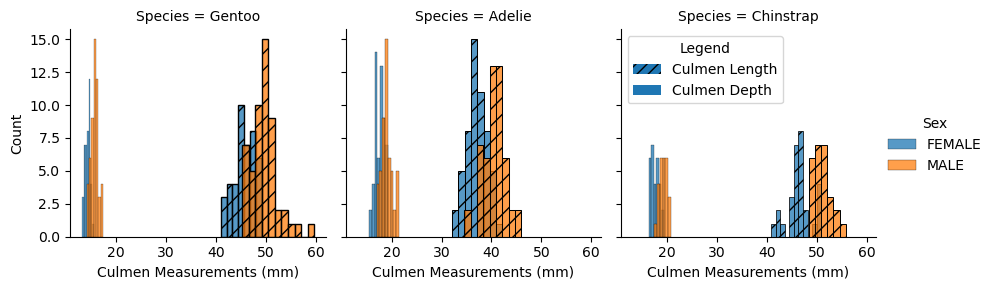

In [57]:
import seaborn as sns

train_copy = train.drop(["Comments"],axis=1)
train_copy = train_copy.dropna()
train_copy = train_copy[train_copy["Sex"] != "."]
train_copy['Species'] = train_copy['Species'].replace('Adelie Penguin (Pygoscelis adeliae)','Adelie')
train_copy['Species'] = train_copy['Species'].replace('Gentoo penguin (Pygoscelis papua)','Gentoo')
train_copy['Species'] = train_copy['Species'].replace('Chinstrap penguin (Pygoscelis antarctica)','Chinstrap')
#train_copy
g = sns.FacetGrid(train_copy, col='Species',hue="Sex")
g.map(sns.histplot, 'Culmen Length (mm)',hatch="//")#,order = ['Adelie Penguin (Pygoscelis adeliae)','Chinstrap penguin (Pygoscelis antarctica)','Gentoo penguin (Pygoscelis papua)'])

g.map(sns.histplot, 'Culmen Depth (mm)',hatch=None)#,order = ['Adelie Penguin (Pygoscelis adeliae)','Chinstrap penguin (Pygoscelis antarctica)','Gentoo penguin (Pygoscelis papua)'])
g.set_axis_labels(x_var="Culmen Measurements (mm)")

import matplotlib.patches as mpatches

length_patch = mpatches.Patch(hatch="///", label='The red data')
depth_patch = mpatches.Patch(label='The red data')

plt.legend(title='Legend', loc='upper left', labels=['Culmen Length','Culmen Depth'],handles=[length_patch,depth_patch])
g.tight_layout()
g.add_legend()


plt.show(g)

Seaborns is a helpful tool for visualizing our data instead of trying to conceptualize numbers.

Ignoring the code, here I have the Culmen Length and Depth for each penguin as histograms. I've separated with colors the sexes into male and female as well.

I've separated male and female because of sexual dimorphism - in many animals, the different sexes tend to be different sizes. In fact, I would guess that the males tend to be larger, or at least have larger bill sizes. It seems this is a variable that is important to separate. Without this distinction, our data is strangely bimodal, and has a larger spread than perhaps it should when separated as such.

So we can see, Gentoo penguins have Culmen Depths at around 10 mm, Length around 50 mm.
The Adelie penguins have larger Culmen Depths closer to 20 mm, and smaller Lengths around 40 mm.
The Chinstrap penguins have Culment Depths also around 20 mm, but larger lengths around 50 mm.

So just with Culment Depth and Length, we could make some guesses about the species. A large depth but small length is probably and Adelie, a large depth and large length is probably a Chinstrap, a small depth but large length is probably a Gentoo. Our hypothesis: the bill size is important! Darwin would be proud.

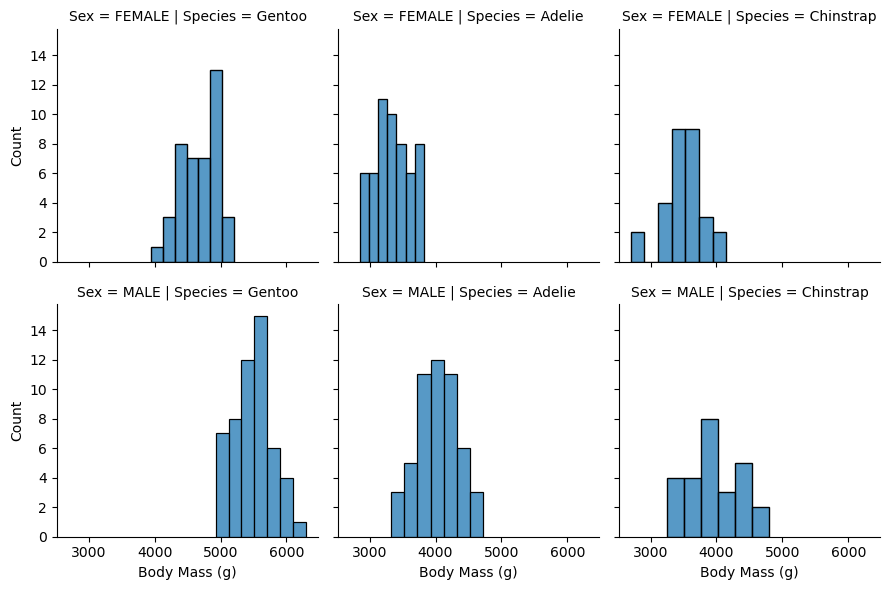

In [8]:
g = sns.FacetGrid(train_copy, col='Species',row='Sex')
g.map(sns.histplot, 'Body Mass (g)')

So the males are indeed generally heavier than the females. Penguins are probably sexually dimorphic.

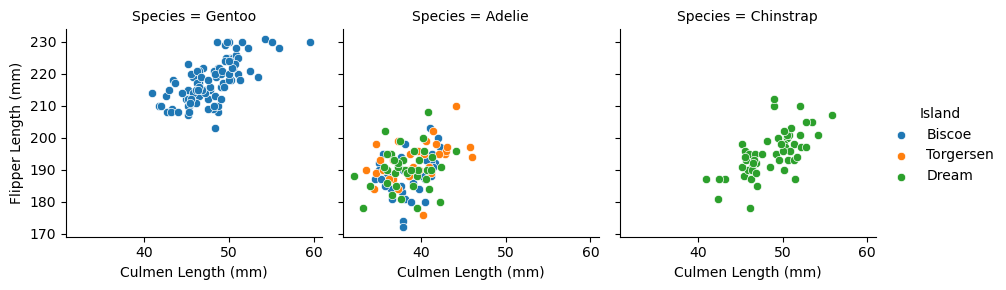

In [9]:
g = sns.FacetGrid(train_copy, col='Species',hue="Island")
g.map(sns.scatterplot, 'Culmen Length (mm)','Flipper Length (mm)')#,order = ['Adelie Penguin (Pygoscelis adeliae)','Chinstrap penguin (Pygoscelis antarctica)','Gentoo penguin (Pygoscelis papua)'])
#g.map(sns.scatterplot, 'Culmen Length (mm)','Flipper Length (mm)')#,order = ['Adelie Penguin (Pygoscelis adeliae)','Chinstrap penguin (Pygoscelis antarctica)','Gentoo penguin (Pygoscelis papua)'])
g.add_legend()

I also think Flipper Length and with Culmen Length can separate our species, and it seems that generally the Gentoos are on the top right, Adelies somewhere bottom left, Chinstraps in the middle of the bottom.

It seems also that Island, as we observed before, can help classify our species. Biscoe penguins could be Gentoo, Dream penguins could be Chinstrap or Adelie (which flipper/culmen length can distinguish), the rest are Adelies.

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile, chi2

X_trans = SelectKBest(f_classif, k=2)
X_new = X_trans.fit_transform(X_train.loc[:, ~X_train.columns.isin(['Stage_Adult, 1 Egg Stage'])], y_train)
#print(X_trans.feature_names_in_)
#print(X_trans.scores_)
#print(X_trans.pvalues_)

X_feature_scores = pd.DataFrame(X_trans.scores_, index=X_trans.feature_names_in_, columns = ["Scores"])
X_feature_scores = X_feature_scores.sort_values("Scores",ascending=False)
print(X_feature_scores)

print("Features selected: ",X_trans.get_feature_names_out())

                           Scores
Flipper Length (mm)    447.490189
Culmen Length (mm)     304.461212
Body Mass (g)          292.246094
Culmen Depth (mm)      260.180770
Island_Biscoe          218.758143
Delta 13 C (o/oo)      182.985274
Island_Dream           180.780124
Delta 15 N (o/oo)      164.389072
Island_Torgersen        33.506796
Clutch Completion_No     3.635284
Clutch Completion_Yes    3.635284
Sex_MALE                 0.758649
Sex_FEMALE               0.758649
Features selected:  ['Culmen Length (mm)' 'Flipper Length (mm)']


Without too much detail, this ranks the features in terms of importance. A bit surprising and unsurprising that Culmen Length and Flipper Length rank the highest. Body Mass and Island are also notably important features.

## Choose A Model

In [11]:
test_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

X_test, y_test = prepare_data(test)

Some test data has been reserved for us, which I will not touch or examine.

The models I'll examine are the Support Vector Machine, Decision Tree Classifier, and the Random Forest Classifier.

For Support Vector Machine I modulate the gamma parameter from $10^{-5}$ to $10^{5}$, and for the Decision Tree and Random Forest Classifiers, I iterate out to a maximum depth of 10. My reasoning, which may be flawed, is that there are at most around 6 features (if Island is included), so the depth should be a similar order.

In [58]:
#for test all features 
from itertools import combinations 

#models
from sklearn.svm import SVC #Support Vector Machine
from sklearn.tree import DecisionTreeClassifier #Decision Trees
from sklearn.ensemble import RandomForestClassifier #Random Forest

from sklearn.model_selection import cross_val_score #cross-validation package

all_qual_cols = ["Clutch Completion", "Sex", "Island"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)','Body Mass (g)']

svc_model_test_scores = np.array([])
decisiontree_model_test_scores = np.array([])
randomforest_model_test_scores = np.array([])

svc_model_max_params = []
decisiontree_model_max_params = []
randomforest_model_max_params = []

cols_list = []

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = qual_cols + list(pair) 
    
    # you could train models and score them here, keeping the list of 
    # columns for the model that has the best score. 
    
    #for SVC
    svc_params = 10.0**np.arange(-5, 5)
    
    #for DecisionTreeClassifier
    decisiontree_params = [i for i in range(1,11)]
    #decisiontree_params = [2]
    
    svc_max_score = 0.0
    svc_max_score_param = 0.0
    
    decisiontree_max_score = 0.0
    decisiontree_max_score_param = 0.0
    
    randomforest_max_score = 0.0
    randomforest_max_score_param = 0.0
    
    scores = np.array([])
    
    for param in svc_params:
        loop_model = SVC(gamma  = param)
        for i in range(10):
            
            cv_scores = cross_val_score(loop_model, X_train[cols], y_train, cv = 5)
            scores = np.append(scores,cv_scores)
        
        cv_scores_mean = scores.mean()
        if ( cv_scores_mean > max_score):
            svc_max_score = cv_scores_mean
            svc_max_score_param = param
            
    scores = np.array([])
            
    for param in decisiontree_params:
        loop_model = DecisionTreeClassifier(max_depth  = param)
        
        for i in range(10):
            
            cv_scores = cross_val_score(loop_model, X_train[cols], y_train, cv = 5)
            scores = np.append(scores,cv_scores)
        
        cv_scores_mean = scores.mean()
        
        if ( cv_scores_mean > decisiontree_max_score):
            decisiontree_max_score = cv_scores_mean
            decisiontree_max_score_param = param
            
    scores = np.array([])
            
    for param in decisiontree_params:
        loop_model = RandomForestClassifier(max_depth = param)
        for i in range(10):
            
            cv_scores = cross_val_score(loop_model, X_train[cols], y_train, cv = 5)
            scores = np.append(scores,cv_scores)
        
        cv_scores_mean = scores.mean()
        
        if ( cv_scores_mean > randomforest_max_score):
            randomforest_max_score = cv_scores_mean
            randomforest_max_score_param = param
            
    
      
    svc_model = SVC(gamma = svc_max_score_param)
    decisiontree_model = DecisionTreeClassifier(max_depth = decisiontree_max_score_param)
    randomforest_model = RandomForestClassifier(max_depth = randomforest_max_score_param)
    
    svc_model.fit(X_train[cols],y_train)
    svc_model_score = svc_model.score(X_test[cols], y_test)
    
    decisiontree_model.fit(X_train[cols],y_train)
    decisiontree_model_score = decisiontree_model.score(X_test[cols], y_test)
    
    randomforest_model.fit(X_train[cols],y_train)
    randomforest_model_score = randomforest_model.score(X_test[cols], y_test)
    
    svc_model_test_scores = np.append(svc_model_test_scores,svc_model_score)
    decisiontree_model_test_scores = np.append(decisiontree_model_test_scores,decisiontree_model_score)
    randomforest_model_test_scores = np.append(randomforest_model_test_scores,randomforest_model_score)
    
    svc_model_max_params.append(str(svc_max_score_param))
    decisiontree_model_max_params.append(str(decisiontree_max_score_param))
    randomforest_model_max_params.append(str(randomforest_max_score_param))
    
    cols_list.append(cols)

Our data set does not have a lot of features, so we can actually train different types of models to see what the best features for classifying penguins are. Essentially, we are testing our hypothesis. By choosing two quantitative and one qualitative feature, we can train our models, use cross validation to find the best model parameters, and output the features corresponding to the highest test scores.

If our features are indeed related to the species of the penguin, they should have a high test score. Unless, of course, our data is biased and the features simply recognize the patterns in the bias.

In [62]:
svc_results = sorted(zip(svc_model_test_scores, svc_model_max_params, cols_list), reverse=True)
decisiontree_results = sorted(zip(decisiontree_model_test_scores, decisiontree_model_max_params, cols_list), reverse=True)
randomforest_results = sorted(zip(randomforest_model_test_scores, randomforest_model_max_params, cols_list), reverse=True)[:3]

def print_results(results,name):
    for i in range(3):
        print(name," - Max Test Score: ",results[i][0],", Parameter: ",results[i][1],", Features: ",results[i][2])

print_results(svc_results,"SVC")
print_results(decisiontree_results,"DecisionTreeClassifier")
print_results(randomforest_results,"RandomForestClassifier")

SVC  - Max Test Score:  0.9264705882352942 , Parameter:  1.0 , Features:  ['Island_Biscoe', 'Island_Dream', 'Island_Torgersen', 'Culmen Length (mm)', 'Flipper Length (mm)']
SVC  - Max Test Score:  0.9117647058823529 , Parameter:  1.0 , Features:  ['Sex_FEMALE', 'Sex_MALE', 'Culmen Length (mm)', 'Flipper Length (mm)']
SVC  - Max Test Score:  0.9117647058823529 , Parameter:  1.0 , Features:  ['Clutch Completion_No', 'Clutch Completion_Yes', 'Culmen Length (mm)', 'Flipper Length (mm)']
DecisionTreeClassifier  - Max Test Score:  1.0 , Parameter:  10 , Features:  ['Sex_FEMALE', 'Sex_MALE', 'Culmen Length (mm)', 'Flipper Length (mm)']
DecisionTreeClassifier  - Max Test Score:  0.9852941176470589 , Parameter:  10 , Features:  ['Island_Biscoe', 'Island_Dream', 'Island_Torgersen', 'Culmen Length (mm)', 'Flipper Length (mm)']
DecisionTreeClassifier  - Max Test Score:  0.9852941176470589 , Parameter:  10 , Features:  ['Island_Biscoe', 'Island_Dream', 'Island_Torgersen', 'Culmen Length (mm)', 'Cul

As we can see, the best model that reaches 100% accuracy on the test data is the RandomForestClassifier. The best features are the sex, Culmen Length, and Flipper Length. Island is a close second for the DecisionTreeClassifier, and first for the Support Vector Machine.

I do find the sex being important feature interesting. I would have expected Island to be a much better predictor. Perhaps it is because of the bimodal effect that sex has on Culmen Length and Flipper Length. Without accounting for sex, it may be that the Culment Length and Flipper Length, which are primary predictors of the species, have too large a spread to accurately separate.

## Conclusions

Running our Random Forest Classifier model, we achieve a perfect testing accuracy!

In [60]:
penguin_model = RandomForestClassifier(max_depth = 9)
penguin_cols = ['Culmen Length (mm)', 'Flipper Length (mm)','Sex_FEMALE', 'Sex_MALE']
penguin_model.fit(X_train[penguin_cols],y_train)

print("Training accuracy: ",penguin_model.score(X_train[penguin_cols],y_train))
print("Training accuracy (cross-validation): ",cross_val_score(penguin_model,X_train[penguin_cols],y_train,cv=5).mean())
print("Testing accuracy: ",penguin_model.score(X_test[penguin_cols],y_test))

Training accuracy:  1.0
Training accuracy (cross-validation):  0.9650829562594267
Testing accuracy:  1.0


Perhaps the perfect training accuracy is not so ideal. It may be an indicator of overfitting.

In [18]:
from matplotlib.patches import Patch

def plot_regions(model, X, y):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
    
      print(qual_features[i])
        
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))
        
      axarr[i].set_title(str(qual_features[i]))

      plt.legend(title = "Species", handles = patches, loc = 'upper left')
      
      plt.tight_layout()

Sex_FEMALE
Sex_MALE


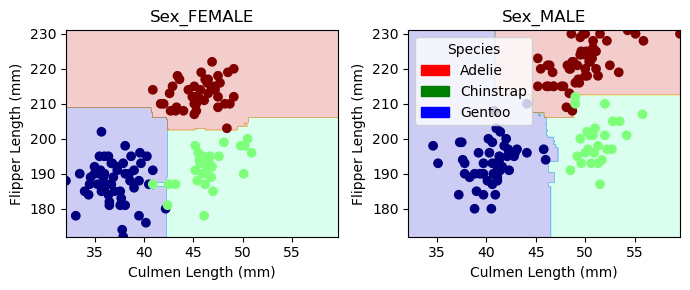

In [61]:
plot_regions(penguin_model, X_train[penguin_cols], y_train)

Plotting the decision boundary, we see that it is fairly faithful to the data, whether the sex of the penguins is male or female. Perhaps there are a couple of data points for which it is overfit. 

Regardless, we have demonstrated that for this Palmer Penguins data set, it is possible to use machine learning to accurately classify the species of the penguin - and using only three features!